# Based on "Baseline fit"
#### by Jannick Schulze changed by me :-)

In [4]:
pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lmfit


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 KB 2.5 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import required modules:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel



#### Settings

In [2]:
# insert the path to your Data here:
datapath = "/users/jburke/ebhis_scripts/spectral_stuff" #directory path where the data is stored

# order of the polynom to use to fit background:
deg_polynom = 7 # up to 7

# max. number of gauss peaks to fit:
N_peaks = 12
add_gaussians = 6

# number of edge bins to ignore:
N_edge_bins = 25


#### load data and plot data

spectrum_NGC2403.csv


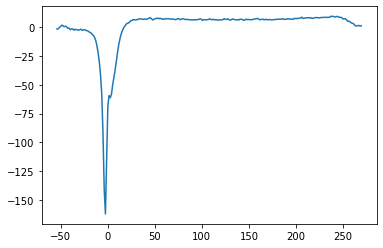

In [3]:
# load data:

pathlist = glob.glob("spectrum_NGC2403.csv") 

path = pathlist[0]
print(path)

#if survey == 'HIsurvey':
#   x, y = read_HIsurvey_file(path)
#elif survey == 'sto2'or 'srtbn':
dat = np.loadtxt(path, delimiter=',', skiprows=1)
    # cut the edge bins, as they are unreliable

dat_use = np.asarray(dat[428:680]) #this is the limit in channel number. It applies to all y-values as well

#dat_use = np.asarray(dat[130:480]) #OH
#dat_use = np.asarray(dat[0:])

    # x: v_LSR
x = dat_use[:, 0]

    # y: T_A
y = dat_use[:, 1]

    # data for the background: In this case I have the impression that the annulus is too tight. I can see the galaxy!
    
y_back = dat_use[:, 2]

#else:
#    raise ValueError('Unknown survey name. Please check whether the datapath and spelling are correct.')



# plot the part of the spectrum we are actually using:
plt.plot(x,y-y_back)

#### Background/Baseline fit

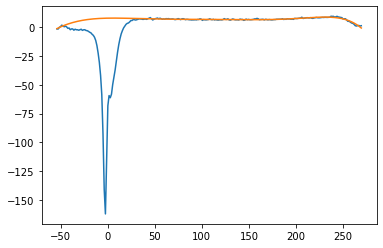

In [4]:
# vLSR range in which we expect our signal of the Milky Way confusion
signal_range = [-48,30]  # this is a sensitive range!!!!

def coarseBackgroundModel(x,y,deg,signal_range):
    """
    coarse fit of a polynomial model to the entire data for a first background reduction:
    
    x: v_LSR  
    y: T_A
    deg: degree of the polynom to fit to the data
    
    """
    # set up polynomial model
    poly_mod = PolynomialModel(deg, prefix='p1_')
    
    mask= ((x<signal_range[0]) | (x>signal_range[1]))
    x_ = x[mask]
    y_ = y[mask]
    
    # let lmfit guess the parameter values:
    p_bg = poly_mod.guess(y_, x=x_)
    
    # set up our background model (only polynomial here):
    mod_bg = poly_mod
    
    # initialize the model with the guessed parameters:
    init_bg = mod_bg.eval(p_bg, x=x_)
    
    # fit the model:
    out_bg = mod_bg.fit(y_, p_bg, x=x_)
    
    # return results:
    return p_bg, out_bg, mod_bg

# now do it:
p_bg, out_bg, mod_bg = coarseBackgroundModel(x,y-y_back,deg_polynom,signal_range)

background = mod_bg.eval(p_bg,x=x)

# and plot the result
#plt.plot(x,y)
plt.plot(x,y-y_back, label='MALS')
plt.plot(x,background)



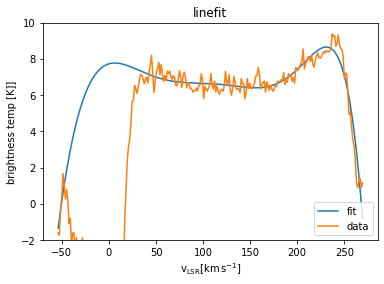

In [5]:
plt.plot(x,background, label='fit')

y_HI_scale = y-y_back
plt.plot(x,y_HI_scale, label='data')
plt.legend(loc="lower right")
plt.title('linefit')
plt.xlabel('v$_\mathrm{LSR} [\mathrm{km\,s^{-1}}]$')
plt.ylabel('brightness temp [K]]')
plt.ylim(-2., 10.)
plt.show()